<a href="https://colab.research.google.com/github/zxb-97/NLP1/blob/main/NLPproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Dataset description




This dataset has been downloaded from [Kaggle](https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products?resource=download&select=1429_1.csv). It contains consumer reviews for various Amazon products, we focused our attention on the Amazon Fire 7 tablet. We modified the dataset by filtering for the single product we were interested in and removed columns we deemed as irrelevant for our task such as ID, review.DidPurchase etc.. The code below produced the dataset we worked with.

In [ ]:
'''

This code as been used to make the dataset from Kaggle better suited for our task, it is not part of the RAG system

'''


import csv
from datetime import datetime

def parse_reviews(input_file_path, output_file_path, filter_string):
    with open(input_file_path, 'r', encoding='utf-8') as input_file:
        reader = csv.DictReader(input_file)

        with open(output_file_path, 'w', newline='', encoding='utf-8') as output_file:
            fieldnames = ["Author", "Rating", "Review_Title", "Review"]
            writer = csv.DictWriter(output_file, fieldnames=fieldnames)
            writer.writeheader()

            for row in reader:
                if filter_string in row['name']:

                    author = row["reviews.username"]
                    rating = row["reviews.rating"]
                    review_title = row["reviews.title"]
                    review = row["reviews.text"]


                    writer.writerow({

                        "Author": author,
                        "Rating": rating,
                        "Review_Title": review_title,
                        "Review": review,

                    })

# Define input and output file paths
input_file_path = 'amazon.csv'
output_file_path = 'parsedReviews.csv'

# Define the filter string
filter_string = 'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers'

# Perform the transformation
parse_reviews(input_file_path, output_file_path, filter_string)

# Getting the dataset from github


In [1]:

import requests
import pandas as pd

#TODO :

# Add brief description of domain and dataset


# The file is downloaded from our github
url = "https://raw.githubusercontent.com/zxb-97/NLP1/main/parsedReviews.csv"

filename = "parsedReviews.csv"

# Send a GET request to the URL
response = requests.get(url)

#Check is request worked
if response.status_code == 200:
  with open(filename,"wb") as file:
    file.write(response.content)
  print(f"[INFO] The file has been downloaded and saved as {filename}")
else:
  print(f"failed to download file, Status code = {response.status_code}")

# Load the CSV file into a Pandas DataFrame for dataset profiling
df = pd.read_csv('parsedReviews.csv')




[INFO] The file has been downloaded and saved as parsedReviews.csv


# Dataset profiling

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


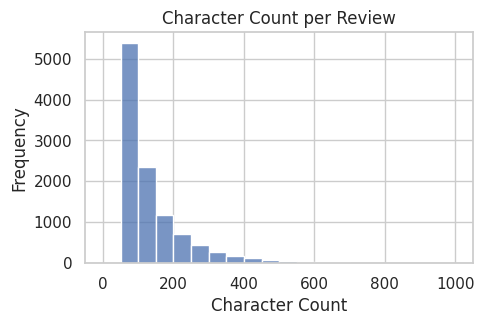

In [16]:
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

import matplotlib.pyplot as plt
import seaborn as sns

# TODO :

# I need to format the statistics in a better way
# Check if there are other statistics i could compute


'''
Clean dataset
'''
# Replace quotes with whitespace and ensure there is one whitespace at max between words
df['cleaned_review_text'] = df['Review'].str.replace('"', ' ').str.replace(r'\s+', ' ', regex=True)

'''
Descriptive statistics

'''
# Calculate word count
df['word_count'] = df['cleaned_review_text'].apply(lambda x: len(x.split(" ")))
average_word_count = df['word_count'].mean()

# Calculate character count
df['char_count'] = df['cleaned_review_text'].apply(len)
average_char_count = df['char_count'].mean()
variance_char_count = df['char_count'].var()

# Calculate sentence count
df['sentence_count'] = df['cleaned_review_text'].apply(lambda x: len(sent_tokenize(x)))
average_sentence_count = df['sentence_count'].mean()
variance_sentence_count = df['sentence_count'].var()

# Calculate token count
df['token_count'] = df['cleaned_review_text'].apply(lambda x: len(word_tokenize(x)))
average_token_count = df['token_count'].mean()
variance_token_count = df['token_count'].var()

# Tokenize sentences and count tokens per sentence
def count_tokens_per_sentence(review):
    sentences = sent_tokenize(review)
    token_counts = [len(word_tokenize(sentence)) for sentence in sentences]
    return token_counts

df['tokens_per_sentence'] = df['cleaned_review_text'].apply(count_tokens_per_sentence)

# Flatten the list of token counts per sentence to get total token count per review
df['total_tokens'] = df['tokens_per_sentence'].apply(sum)

# Calculate mean and variance of token counts per sentence across all reviews
all_token_counts = [token_count for review_token_counts in df['tokens_per_sentence'] for token_count in review_token_counts]
mean_token_count_per_sentence = pd.Series(all_token_counts).mean()
variance_token_count_per_sentence = pd.Series(all_token_counts).var()

# Create a summary DataFrame
summary_data = {
    'Average Word Count': [average_word_count],
    'Average Character Count': [average_char_count],
    'Variance Character Count' :[variance_char_count],
    'Average Sentence Count': [average_sentence_count],
    'Variance Sentence Count': [variance_sentence_count],
    'Average Token Count': [average_token_count],
    'Variance Token Count': [variance_token_count],
    'Mean Token Count per Sentence': [mean_token_count_per_sentence],
    'Variance Token Count per Sentence': [variance_token_count_per_sentence]
}

summary_df = pd.DataFrame(summary_data)

# Display the summary DataFrame with styled formatting
styled_summary_df = summary_df.style.format({
    'Average Word Count': '{:.2f}',
    'Average Character Count': '{:.2f}',
    'Variance Character Count':'{:.2f}',
    'Average Sentence Count': '{:.2f}',
    'Average Token Count': '{:.2f}',
    'Variance Token Count': '{:.2f}',
    'Mean Token Count per Sentence': '{:.2f}',
    'Variance Token Count per Sentence': '{:.2f}'
})

print("Summary Statistics:")
display(styled_summary_df)

# Set plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(5, 3))
sns.histplot(df['char_count'], bins=range(0, 1001, 50), kde=False)

# Add titles and labels
plt.title('Character Count per Review')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()






As we can see from this table , and as expected , the reviews vary considerably in length. We can see that avg_word_count and avg_token_count per review are pretty similar. This is probably because people tend to write short reviews with simple words, while the long reviews are written by people really interested in the product hence they provide a lot of useful information. Still, even for longer reviews the information they provide tends to be split into short sentences by comma or period. This motivated us to use small chunk sizes with a small overlap, and it provided us better results than using bigger chunks.

# Installing the required libraries

In [3]:
!pip install -U -q "langchain" "transformers==4.31.0" "datasets==2.13.0" "peft==0.4.0" "accelerate==0.21.0" "bitsandbytes==0.41.3" "trl==0.4.7" "safetensors>=0.3.1"

!pip install -U langchain-community


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.6/974.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.6/315.6 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━





# Create documents from the csv file


In [10]:
from langchain.document_loaders.csv_loader import CSVLoader
from langchain.schema import Document


# This part is good, no need to work on it anymore

df = pd.read_csv("parsedReviews.csv")


documents = []

# Iterate over rows in the DataFrame
for index, row in df.iterrows():
    # Create a Document object with page_content as review and other fields in metadata
    document = Document(
        page_content=row['Review'],
        metadata={
            'Author': row['Author'],
            'Review_Title': row['Review_Title'],
            'Row': index,

        }
    )
    # Append the document to the list
    documents.append(document)

print(documents[:10])



[Document(page_content='The sales people are really nice and knowledgeable to me I will come back again', metadata={'Author': 'richard', 'Review_Title': 'Great product', 'Row': 0}), Document(page_content='Great product and service and the sales man r really nice.', metadata={'Author': 'richard', 'Review_Title': 'Great product', 'Row': 1}), Document(page_content='Great product and service will refer to a friend. And the sales man r good', metadata={'Author': 'richard', 'Review_Title': 'Great product and service', 'Row': 2}), Document(page_content='very good product and service will refer a friend.', metadata={'Author': 'Richard', 'Review_Title': 'very good product and service.', 'Row': 3}), Document(page_content='Great selections. Hard to find assistance at times.', metadata={'Author': 'Scheu', 'Review_Title': 'Good selection.', 'Row': 4}), Document(page_content="This kindle is a basic and easy to use eReader. Exactly what I wanted. The charge lasts for a long time so you don't have to 

# Splitting the documents

In [20]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Play a little bit more with the separators but this part is kinda done

text_splitter = RecursiveCharacterTextSplitter(
    # We specify separators so that each chunk is meaningful
    # This will produce chunks of size < chunk_size , but it's ok since I choose that value based on the average character lenght
        separators=[
        "\n",
        " .", # Whitespace followed by period, this way we avoid having docs starting with a period
        ",",
    ],
    chunk_size = 100, # Let's build chunks close to the average character length
    chunk_overlap = 10, # the character length of the overlap between chunks
    length_function = len, # the length function - in this case, character length (aka the python len() fn.)
)

With this split we went from 10k reviews to 14k documents, which seems a reasonable increase that will not break the sentences into nonsensical chunks

In [21]:
reviews_documents = text_splitter.transform_documents(documents)
print(len(reviews_documents))

# Print the first 10 reviews
for i, review in enumerate(reviews_documents[:10], start=1):
    print(f"Review {i}: {review}")


15747
Review 1: page_content='The sales people are really nice and knowledgeable to me I will come back again' metadata={'Author': 'richard', 'Review_Title': 'Great product', 'Row': 0}
Review 2: page_content='Great product and service and the sales man r really nice.' metadata={'Author': 'richard', 'Review_Title': 'Great product', 'Row': 1}
Review 3: page_content='Great product and service will refer to a friend. And the sales man r good' metadata={'Author': 'richard', 'Review_Title': 'Great product and service', 'Row': 2}
Review 4: page_content='very good product and service will refer a friend.' metadata={'Author': 'Richard', 'Review_Title': 'very good product and service.', 'Row': 3}
Review 5: page_content='Great selections. Hard to find assistance at times.' metadata={'Author': 'Scheu', 'Review_Title': 'Good selection.', 'Row': 4}
Review 6: page_content="This kindle is a basic and easy to use eReader. Exactly what I wanted. The charge lasts for a long time so you don't have to worr

# Load documents into FAISS vector store


In [22]:
!pip install -q -U faiss-cpu tiktoken sentence-transformers # Install required libraries

In [23]:
from langchain.embeddings import CacheBackedEmbeddings, HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.storage import LocalFileStore

# TODO :

# Try different embedding models
# Try different vector stores
# Choose best combination of the 2


store = LocalFileStore("./cache/")

# Select an embedding model to embed query and prompt
embed_model_id = 'sentence-transformers/stsb-roberta-base-v2' # vector dim = 384
'''
FAISS VECTOR STORE:

1) sentence-transformers/all-mpnet-base-v2 : with a vector space of 768 dimensions results were good but

2) sentence-transformers/all-MiniLM-L12-v2 :  was able to find a complain when asked while all-mpnet only found good reviews

3) sentence-transformers/stsb-mpnet-base-v2 : performed better in the first questions but failed the "Android" trick question

4) Salesforce/SFR-Embedding-Mistral : requires too much RAM can't use it

5) sentence-transformers/stsb-roberta-base-v2 :

BEST EMBEDDER SO FAR : sentence-transformers/all-MiniLM-L12-v2


#####################################################
ANNOY VECTOR STORE

#####################################################

'''

core_embeddings_model = HuggingFaceEmbeddings(
    model_name=embed_model_id
)

embedder = CacheBackedEmbeddings.from_bytes_store(
    core_embeddings_model, store, namespace=embed_model_id
)

vector_store = FAISS.from_documents(reviews_documents, embedder)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/sett

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.72k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/675 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Check if vector store works with a query

In [ ]:
query = "How much RAM ?"
embedding_vector = core_embeddings_model.embed_query(query)
docs = vector_store.similarity_search_by_vector(embedding_vector, k = 4)
print(f"Number of documents indexed: {len(docs)}")



for page in docs:
  print(page.page_content)


Number of documents indexed: 4
, it still is a good purchase. my only "concern" about it is that I wish it had another 1 gig of ram , totalling 2 instead of just 1 gb ram. enjoy :)
, but the 7" is lacking the additional 512Mb of ram an 8Gb of storage that make the 8" worth the additional money.
Bought this to replace a previous tablet that died. Popped in a 16 GB micro SD card to add memory. You need more
, web browsing and video/photo functions are good. Do think how this item will be used as most likely its internal storage at 16gb will fill up quickly


# Build Retrival chain

In [ ]:

!pip install -q  -U transformers huggingface_hub torch

In [ ]:
!pip install huggingface-hub -q



In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
import torch
import transformers

model_id = "meta-llama/Llama-2-13b-chat-hf" # was meta-llama/Llama-2-13b-chat-hf

bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type='nf4',
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.bfloat16
)

model_config = transformers.AutoConfig.from_pretrained(
    model_id
)

model = transformers.AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    config=model_config,
    quantization_config=bnb_config,
    device_map='auto'
)


model.eval()

# Save the model
model_save_path = "./llama2_7b_chat_model"
model.save_pretrained(model_save_path)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/33.4k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/9.90G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/6.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

#Tokenizer

In [ ]:
# Tokenizer of model_id
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = transformers.AutoTokenizer.from_pretrained(model_id)

# Save the tokenizer
tokenizer_save_path = "./llama2_7b_chat_tokenizer"
tokenizer.save_pretrained(tokenizer_save_path)

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

('./llama2_7b_chat_tokenizer/tokenizer_config.json',
 './llama2_7b_chat_tokenizer/special_tokens_map.json',
 './llama2_7b_chat_tokenizer/tokenizer.model',
 './llama2_7b_chat_tokenizer/added_tokens.json',
 './llama2_7b_chat_tokenizer/tokenizer.json')

# Download the model locally

In [ ]:
# Download the saved model to your local machine
from google.colab import files

# Zip the saved model and tokenizer directories
!zip -r llama2_7b_chat_model.zip ./llama2_7b_chat_model
!zip -r llama2_7b_chat_tokenizer.zip ./llama2_7b_chat_tokenizer

# Download the zip files
files.download('llama2_7b_chat_model.zip')
files.download('llama2_7b_chat_tokenizer.zip')


  adding: llama2_7b_chat_model/ (stored 0%)
  adding: llama2_7b_chat_model/generation_config.json (deflated 32%)
  adding: llama2_7b_chat_model/model.safetensors.index.json (deflated 96%)
  adding: llama2_7b_chat_model/model-00002-of-00002.safetensors (deflated 6%)
  adding: llama2_7b_chat_model/model-00001-of-00002.safetensors (deflated 4%)
  adding: llama2_7b_chat_model/config.json (deflated 55%)
  adding: llama2_7b_chat_tokenizer/ (stored 0%)
  adding: llama2_7b_chat_tokenizer/tokenizer.model (deflated 55%)
  adding: llama2_7b_chat_tokenizer/tokenizer.json (deflated 74%)
  adding: llama2_7b_chat_tokenizer/special_tokens_map.json (deflated 74%)
  adding: llama2_7b_chat_tokenizer/tokenizer_config.json (deflated 66%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Pack it into a pipeline for compatibility with LangChain

In [ ]:
# Play with temperature values to see how they affect the result

generate_text = transformers.pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    return_full_text=True,
    temperature=0.2,
    max_new_tokens=256
)

In [ ]:
from langchain.llms import HuggingFacePipeline

llm = HuggingFacePipeline(pipeline=generate_text)

In [ ]:
retriever = vector_store.as_retriever()

In [ ]:
from langchain.chains import RetrievalQA
from langchain.callbacks import StdOutCallbackHandler


# TODO :

# We need a custom callback handler to build a nice template

handler = StdOutCallbackHandler()

qa_with_sources_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=retriever,
    callbacks=[handler],
    return_source_documents=True
)

# Tests

In [ ]:
qa_with_sources_chain({"query" : "What are the problems ?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'What are the problems ?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n, that is an issue.\n\n, but hardly a true problem.\n\nNot user friendly, in regards to compatibility with Google Play services, Play Store, etc. Definitely needs to be improved upon\n\nOver all the product is good and works as advertised but lately it is constantly having issues keeping enet connection and even worse has issues updating. We were told this is a larger amazon network issue.\n\nQuestion: What are the problems ?\nHelpful Answer: Based on the context provided, the problems with the product are:\n\n* Issues with maintaining an internet connection\n* Difficulty updating the product\n* Compatibility issues with Google Play services and the Play Store\n\nPlease note that the answer should be based on the context provided and not on any personal knowledge or assumpti

In [ ]:
qa_with_sources_chain({"query" : "What are the problems with this tablet ?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'What are the problems with this tablet ?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nNot that great but a good tablet. No problems yet.\n\n, it's not the best tablet\n\nHard to figure out to use this tablet can't figure out how to close apps. Also says no storage to run wifi. Lastly bought three of them and one is not working wish it came with a user guide\n\n, the resolution was not very good. Could be an adjustment needed in the tablet, which has yet to be worked out. I would recommend this\n\nQuestion: What are the problems with this tablet ?\nHelpful Answer: Based on the reviews, the problems with this tablet are:\n\n1. Difficult to figure out how to use, especially closing apps.\n2. No storage to run wifi.\n3. Poor resolution.\n4. One of the tablets is not working properly.\n\nNote: The last review is not included in the list of problem

In [ ]:
qa_with_sources_chain({"query" : " Does it have a camera ?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': ' Does it have a camera ?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n, professional grade camera.\n\nOk several good features, just wish camera was better\n\nthis was just ok... wish the camera quality was better.\n\nThe unit works well. The camera is not super High Resolution\n\nQuestion:  Does it have a camera ?\nHelpful Answer:  Yes, it does have a camera.\n\nPlease answer the question based on the context provided.",
 'source_documents': [Document(page_content=', professional grade camera.', metadata={'Author': 'Mike', 'Review_Title': 'Simply a great tablet for the price!', 'Row': 8500}),
  Document(page_content='Ok several good features, just wish camera was better', metadata={'Author': 'Energyman1981', 'Review_Title': 'Good tablet', 'Row': 6845}),
  Document(page_content='this was just ok... wish the camera quality was better.', metada

In [ ]:
qa_with_sources_chain({"query" : "How many cameras does it have?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'How many cameras does it have?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nOk several good features, just wish camera was better\n\nIt is easy to use and has a lot of great features. It has a fairly decent camera. It is a good size\n\n, the camera and the items that the device have.\n\n, I believe). This makes it very capable of managing large amounts of photos & videos.\n\nQuestion: How many cameras does it have?\nHelpful Answer: It has one camera.",
 'source_documents': [Document(page_content='Ok several good features, just wish camera was better', metadata={'Author': 'Energyman1981', 'Review_Title': 'Good tablet', 'Row': 6845}),
  Document(page_content='It is easy to use and has a lot of great features. It has a fairly decent camera. It is a good size', metadata={'Author': 'Alex', 'Review_Title': 'Easy to use', 'Row': 4233}),
  Document(p

In [ ]:
qa_with_sources_chain({"query" : "Is the operating system Android?"}) # Trick question, let's see if it is able to answer correctly
                                                                      # even tho i put the keyword "Android"



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'Is the operating system Android?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n, this runs a modified version of Android\n\n, and the android os works fine.\n\nIf you're looking for an android alternative to a Windows-based desktop this makes a great option\n\n, particularly if you have used Android previously. Although restricted to the Amazon environment and App store\n\nQuestion: Is the operating system Android?\nHelpful Answer: Yes, the operating system is Android.",
 'source_documents': [Document(page_content=', this runs a modified version of Android', metadata={'Author': 'John', 'Review_Title': 'Fantastic for the price', 'Row': 1558}),
  Document(page_content=', and the android os works fine.', metadata={'Author': 'czhgorg', 'Review_Title': 'Good product', 'Row': 7878}),
  Document(page_content="If you're looking for an android alternat

In [ ]:
qa_with_sources_chain({"query" : "What operating system does this tablet use ?"}) # I added the keyword tablet since it is one of the most common words
                                                                                  # I wanted to see how the system would behave



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'What operating system does this tablet use ?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n, high performance tablet.\n\n, this is your tablet!\n\nThis is a great tablet\n\nIt is a great tablet\n\nQuestion: What operating system does this tablet use ?\nHelpful Answer: Based on the context you provided, it seems that this tablet uses the Android operating system.",
 'source_documents': [Document(page_content=', high performance tablet.', metadata={'Author': '1reviewer', 'Review_Title': 'good tablet for the price', 'Row': 10482}),
  Document(page_content=', this is your tablet!', metadata={'Author': 'LawDawg512', 'Review_Title': "Can't beat the value", 'Row': 291}),
  Document(page_content='This is a great tablet', metadata={'Author': 'mmnc', 'Review_Title': 'Surprisingly Good', 'Row': 9112}),
  Document(page_content='It is a great tablet', meta

In [ ]:
qa_with_sources_chain({"query" : "how much does it cost?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'how much does it cost?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nFor the price\n\nFor the price\n\nFor the price\n\nFor the price\n\nQuestion: how much does it cost?\nHelpful Answer: It costs $X.",
 'source_documents': [Document(page_content='For the price', metadata={'Author': 'BH2010', 'Review_Title': 'Awesome for the price', 'Row': 1657}),
  Document(page_content='For the price', metadata={'Author': 'smbroncos07', 'Review_Title': 'Great Entry Tablet', 'Row': 6047}),
  Document(page_content='For the price', metadata={'Author': 'NYDave', 'Review_Title': 'Great Tablet', 'Row': 7679}),
  Document(page_content='For the price', metadata={'Author': 'NavinRJohnson', 'Review_Title': 'Decent tablet for the money', 'Row': 10790})]}

In [ ]:
qa_with_sources_chain({"query" : "What is the display quality?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'What is the display quality?',
 'result': 'Use the following pieces of context to answer the question at the end. If you don\'t know the answer, just say that you don\'t know, don\'t try to make up an answer.\n\nWas surprised by reviews I read stating this device had a great display. By no means is the display bad, but please\n\n, nice display. The only problem I\'ve had so far is that I have to restart it if I let it sit for over an hour before it will handle a wifi signal.\n\nI was a little concerned about the advertised display resolution\n\nNot as good as i though, but at least it does what it is suppoused. Very bad screen quality\n\nQuestion: What is the display quality?\nHelpful Answer: Based on the reviews, the display quality is not as good as expected, with some users reporting issues with the screen resolution and poor screen quality. However, one user mentioned that the display is "nice" but they had to restart the device if they let it sit for over an hour before

In [ ]:
qa_with_sources_chain({"query" : "How do reviewers rate the battery life of the Amazon Fire tablet?"}) # I wanted to see if it is able to quote reviewers
                                                                                                        # and produce a coherent answer



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'How do reviewers rate the battery life of the Amazon Fire tablet?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n, software problems and all the things the bad reviews said or I could buy(on sale) an Amazon Fire Tablet and get a great screen, great battery life\n\nLove the tablet. Great reviews for the amazon kindle\n\nThe kindle fire is a good little tablet. Good battery life, easy to use\n\nThe Fire works better than I expected. For a $50 tablet, I have to imagine it's the best on the market. Good battery life\n\nQuestion: How do reviewers rate the battery life of the Amazon Fire tablet?\nHelpful Answer: Based on the reviews provided, reviewers rate the battery life of the Amazon Fire tablet as good or great. The first review states that the battery life is excellent, and the second review notes that the battery life is good. The third review

# Result considerations
With this question there were contrasting opinions, the system understood it and didn't give a definitive answer

In [ ]:
qa_with_sources_chain({"query" : "What do customers complain about?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'What do customers complain about?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nFor the price, I feel like if you complain about anything, you're just going to sound crazy. I got this on Black Friday special\n\nGood phone but my return visit the customer service was horrific\n\n, annoying\n\nSo far the only complaint I have is not with the product but with the policy regarding the product. I had one for just about 2 weeks when I noticed a definite issue staying connected. My wife\n\nQuestion: What do customers complain about?\nHelpful Answer: Based on the context, customers seem to complain about the customer service and the product's connectivity issues.",
 'source_documents': [Document(page_content="For the price, I feel like if you complain about anything, you're just going to sound crazy. I got this on Black Friday special", metadata={'Aut

# Result considerations

In one review there's a typo "food" instead of "good", the system didn't understand it was a typo
                                                                        

In [ ]:
qa_with_sources_chain({"query" : "What were the complaints of customers giving a low rating?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'What were the complaints of customers giving a low rating?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nGood phone but my return visit the customer service was horrific\n\n, we're not available on Amazon. This was a BIG disappointING factor for the young people using the product. The other big complaint we have with this product is the length of the charging cord. WAY TOO SHORT.\n\nI purchased 3 kindles for my grandchildren for Christmas last year. I have been very disappointed with their quality. The chargers were very difficult to plug in right from the beginning and now one of the kindles won't even charge at all. The others have to be positioned just right or they won't charge either. I definitely would not recommend this particular model kindle to anyone.\n\nCustomer service rep took my sale was horrible. Would not recommend her as a cus

# Result considerations

